In [1]:
n=100
sample_size=n
p=20
p1=10
k=10 # 这里k是变化的
M=5000

In [2]:
# 构造 n*(p+1)维自变量矩阵
import numpy as np
def get_X(p,sample_size):
    X=[]
    for i in range(sample_size):
        x=np.random.normal(0,0.2,p) # sigma_x = 0.2
        x=list(x)
        x.append(1)
        X.append(x)
    return np.array(X)
# X=get_X(p,sample_size)
# print(X.shape)#(101,20)的矩阵

In [3]:
# 构造因变量y=Xbeta+err
# 这里beta是列向量
 

In [4]:
# sigma_y=3
def get_y_vector(X,beta,sample_size):
    y_vector=np.dot(X,beta)+np.random.normal(0,3,sample_size)
    return y_vector
# y_vector=get_y_vector(X,beta,sample_size)
# print(y_vector.shape) #n维的向量

In [5]:
# 给定x0
x0=np.array([1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

In [6]:
print(x0.shape)

(21,)


In [7]:
#求最小二乘估计
def get_beta_hat_k(k,y_vector,X,p):
    X_k=X[:,:k]
    X_k_trans=np.transpose(X_k)
    tmpdot=np.dot(X_k_trans,X_k)
    tmpinverse=np.linalg.inv(tmpdot)
    tmpdot_=np.dot(tmpinverse,X_k_trans)
    beta_hat_k=np.dot(tmpdot_,y_vector)
    beta_hat_k_vector=[]
    for i in range(p+1):
        if i < len(beta_hat_k):
            beta_hat_k_vector.append(beta_hat_k[i])
        else:
            beta_hat_k_vector.append(0)
    return np.array(beta_hat_k_vector)

In [8]:
# beta_hat_k=get_beta_hat_k(10,y_vector,X,p)
# print(beta_hat_k)
# print(beta_hat_k.shape)

In [9]:
def get_expect_y0(x0,beta):
    y0=np.dot(x0,beta)
    return y0

In [10]:
def get_y0_hat_k(k,beta_hat_k,x0):
    y0_hat=np.dot(x0,beta_hat_k)
    return y0_hat
# y0_hat=get_y0_hat_k(k,beta_hat_k,x0)
# print(y0_hat)

In [11]:
def one_iter(p,sample_size,k,x0):
    #这里k是自变量的维度，也是p1的大小。
    # 得到训练集X
    X=get_X(p,sample_size)
    # print("矩阵X的形状为，",X.shape)#(101,20) i.e. (samleSize,p+1)维的矩阵
    beta=get_beta(p,p1)# 这里的p1就是k
    beta=np.array(beta)#(20,1)维的向量
    y_vector=get_y_vector(X,beta,sample_size)
    # 由X计算得到y
    # 由X计算得到y的真实(真实beta不加误差拟合出)
    # y_vector_real=get_y_vector_real(X,beta,sample_size)
        # print("向量y的形状为，",y_vector_real.shape)
    # 由训练集的X和y得到beta的最小二乘估计
    # 这里X和y_vector都是训练集中的数据
    # 由最小二乘估计得到y_hat
    beta_hat_k=get_beta_hat_k(k,y_vector,X,p)
    y0=get_expect_y0(x0,beta)
    y0_hat=get_y0_hat_k(k,beta_hat_k,x0)
    return y0_hat,y0

In [12]:
# one_iter(p,sample_size,k,x0)

In [13]:
# y0_hat_list=[]
# for i in range(M):
#     y0_hat,y0=one_iter(p,sample_size,k,x0)
#     y0_hat_list.append(y0_hat)


In [14]:
def M_iter(p,sample_size,k,x0):
    y0_hat_list=[]
    for i in range(M):
        y0_hat,y0=one_iter(p,sample_size,k,x0)
        y0_hat_list.append(y0_hat)
    return y0_hat_list,y0
    

In [15]:
def get_bias(y0_hat_list,y0):
    y0_hat_list_mean=np.mean(y0_hat_list)
    bias=(y0_hat_list_mean-y0)**2
    return bias
# get_bias(y0_hat_list,y0)

In [16]:
def get_var(y_hat_vector):
    var=0
    y_hat_vector_mean=np.mean(y0_hat_list)
    for y in y_hat_vector:
        var=var+(y-y_hat_vector_mean)**2
    return var/len(y0_hat_list)
# get_var(y0_hat_list)

In [17]:
def get_mse(y0_hat_list,y0):
    mse=0
    for i in y0_hat_list:
        mse=mse+(i-y0)**2
    mse=mse/len(y0_hat_list)
    return mse
# get_mse(y0_hat_list,y0)

In [18]:
bias_list=[]
var_list=[]
mse_list=[]
for k in range(1,p+2):
    y0_hat_list,y0=M_iter(p,sample_size,k,x0)
    bias=get_bias(y0_hat_list,y0)
    var=get_var(y0_hat_list)
    mse=get_mse(y0_hat_list,y0)
    bias_list.append(bias)
    var_list.append(var)
    mse_list.append(mse)

NameError: name 'get_beta' is not defined

In [19]:
p=np.linspace(1,21,21)
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

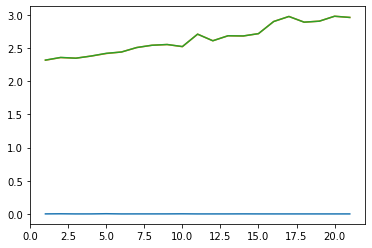

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.plot(p,bias_list)
plt.plot(p,var_list)
plt.plot(p,mse_list)
plt.show()